# Logistic Regression with Statsmodels

### 1. Mathematics behind Logistic Regression
###  2. Importing and Preparing  the dataset
### 3. Bulding the Logistic Regression Model
### 4. Prediction
### 5. Evalution

## 1.  Mathematics behind Logistic Regression
$$  p= \hat {\beta}_{\theta}  + \hat {\beta}_{1} * {X}_{1} $$




                               Logarithm  of the odd ratio between the probability of the success to that of the failure  

$$ \frac {p}{1-p} = \hat {\beta}_{\theta}  + \hat {\beta}_{1} * {X}_{1}$$


$$ ln (\frac {p}{1-p} ) = \hat {\beta}_{\theta}  + \hat {\beta}_{1} * {X}_{1}                  $$


$$ {e^{ln (\frac {p}{1-p}) } } = {e^ {\hat {\beta}_{\theta}  + \hat {\beta}_{1} * {X}_{1}}}    $$


                                       According to the inverse rule

$$ \frac {p}{1-p}= { e^ { {\hat {\beta}_{\theta} } + \hat {\beta}_{1} * {X}_{1}}}              $$

$$ {p}= ({1-p}) *  e^ {\hat {\beta}_{\theta}  + \hat {\beta}_{1} * {X}_{1}}                      $$

$$ {p}= e^ {\hat {\beta}_{\theta}  + \hat {\beta}_{1} * {X}_{1}} - {P} * e^{\hat {\beta}_{\theta}  + \hat {\beta}_{1} * {X}_{1}}                             $$

$$ {p} = \frac  {e^ {  \hat{\beta}_{\theta} + \hat{\beta}_{1} * {X} }} {{1} + e^ {  \hat{\beta}_{\theta} + \hat{\beta}_{1} * {X} } }                         $$





$$ {p} = \frac  {1} {{1} + e^ {  \hat{\beta}_{\theta} + \hat{\beta}_{1} * {X} } }  $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(-10,10,20)
y = 1/(1+np.exp(-(x)))

Text(0.5, 1.0, 'Linear Regression')

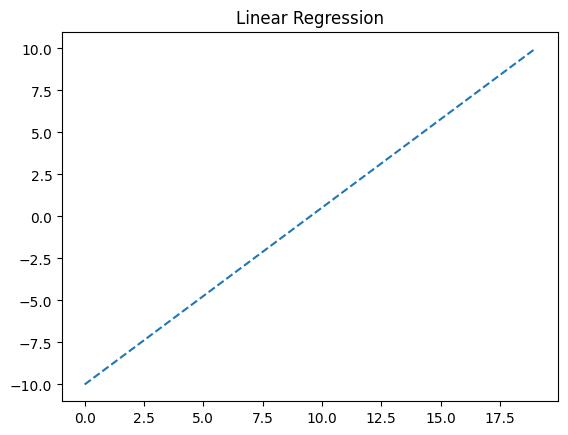

In [3]:
plt.plot(x,ls="--",label='Linear Regression')
plt.title("Linear Regression")

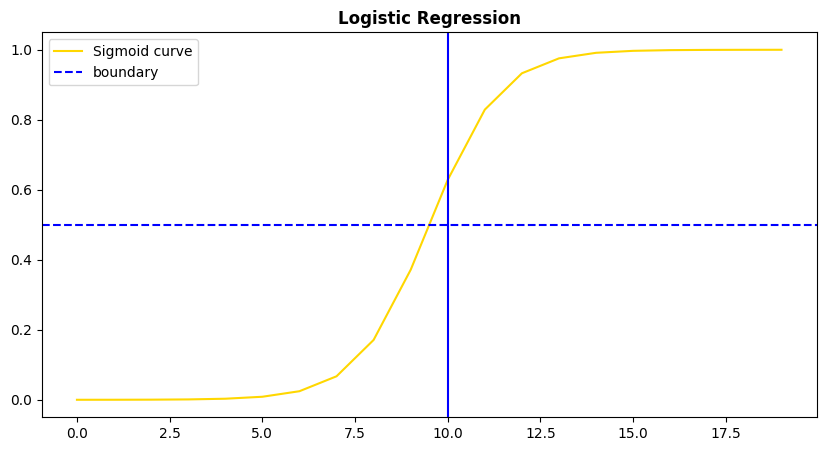

In [4]:
plt.figure(figsize=(10,5))
plt.plot(y,color='gold',label="Sigmoid curve")
plt.axhline(y = 0.5, color ="b", linestyle ="--",label="boundary")
plt.axvline(x = 10, color ="b")
plt.title("Logistic Regression",weight="bold")
plt.legend(loc="best");

In [5]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq,df:stats.chi2.sf(chisq,2)
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

## 2. Importing and Preparing the dataset

In [6]:
df = pd.read_csv(r"C:\Users\kelvin\Downloads\archive (44)\framingham.csv")
print(df.head())

      Sex  age  education currentSmoker  cigsPerDay BPMeds prevalentStroke   
0    Male   39        4.0    NonCurrent         0.0     No              No  \
1  Female   46        2.0    NonCurrent         0.0     No              No   
2    Male   48        1.0       Current        20.0     No              No   
3  Female   61        3.0       Current        30.0     No              No   
4  Female   46        3.0       Current        23.0     No              No   

  prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose   
0           No       No    195.0  106.0   70.0  26.97       80.0     77.0  \
1           No       No    250.0  121.0   81.0  28.73       95.0     76.0   
2           No       No    245.0  127.5   80.0  25.34       75.0     70.0   
3          Yes       No    225.0  150.0   95.0  28.58       65.0    103.0   
4           No       No    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3   

In [7]:
# df=df.iloc[:,[0,1,4,10,14,15]]

## Figuring out Non-Numeric features

In [8]:
feat_object=[i for i in df.columns if df[i].dtypes=="object"]
print(feat_object)

['Sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


## Encoding

In [9]:
for i in df.columns:
    if i in feat_object:
        df[i] =df[i].map({"Male":1,"Female":0,"Yes":1,"No":0,"Current":1,"NonCurrent":0})
print(df.head())

   Sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke   
0    1   39        4.0              0         0.0     0.0                0  \
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose   
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  \
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2       

## Identify  Null Values

In [10]:
for i in df.columns:
    l= df[i].isna().sum()
    if l>0:
        print(i,"column has",df[i].isna().sum(),"null values")

education column has 105 null values
cigsPerDay column has 29 null values
BPMeds column has 53 null values
totChol column has 50 null values
BMI column has 19 null values
heartRate column has 1 null values
glucose column has 388 null values


## Data types

In [11]:
print(df.dtypes)

Sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


## Means for Imputing Null values

In [12]:
for i in df.columns:
    l= df[i].isna().sum()
    if l>0:
        means=df[i].mean()
        print(i,"column has mean of ",means)

education column has mean of  1.9789499153157513
cigsPerDay column has mean of  9.003088619624615
BPMeds column has mean of  0.02962962962962963
totChol column has mean of  236.72158548233045
BMI column has mean of  25.80200758473572
heartRate column has mean of  75.87892376681614
glucose column has mean of  81.96675324675324


## Mean Imputation

In [13]:
df["education"] = df["education"].replace(np.NaN,value=df["education"].mean())
df["cigsPerDay"] = df["cigsPerDay"].replace(np.NaN,value=df["cigsPerDay"].mean())
df["BPMeds"] = df["BPMeds"].replace(np.NaN,value=df["BPMeds"].mean())
df["totChol"] = df["totChol"].replace(np.NaN,value=df["totChol"].mean())
df["BMI"] = df["BMI"].replace(np.NaN,value=df["BMI"].mean())
df["heartRate"] = df["heartRate"].replace(np.NaN,value=df["heartRate"].mean())
df["glucose"] = df["glucose"].replace(np.NaN,value=df["glucose"].mean())

## Checking the Null values

In [14]:
print(df.isna().sum())

Sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


## Indexing both dependent and Indepenent Variables

In [15]:
x1= df[[i for i in df.columns if "TenYearCHD" not in i]]
y= df[[i for i in df.columns if "TenYearCHD"  in i]]

## Partitioning Train and Test Set data

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=42)
X_train.shape,y_train.shape

((2966, 15), (2966, 1))

## 3. Building a Model

In [17]:
model= smf.logit("y_train~X_train",data=X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.381674
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 2966
Model:                          Logit   Df Residuals:                     2950
Method:                           MLE   Df Model:                           15
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.1106
Time:                        20:59:24   Log-Likelihood:                -1132.0
converged:                       True   LL-Null:                       -1272.8
Covariance Type:            nonrobust   LLR p-value:                 3.668e-51
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.1401      0.788    -10.335      0.000      -9.684      -6.596
X_train[0]      0.4193      0.120      3.500      0.000       0.184       0.654
X_train[1]      0.0665      0.007      8.955      0.000       0.052       0.081
X_train[2]      0.0207      0.055      0.376      0.707      -0.087       0.129
X_train[3]     -0.0255      0.171     -0.149      0.882      -0.361       0.310
X_train[4]      0.0231      0.007      3.411      0.001       0.010       0.036
X_train[5]      0.2864      0.264      1.084      0.278      -0.232       0.804
X_train[6]      0.8404      0.500      1.681      0.093      -0.139       1.820
X_train[7]      0.2025      0.152      1.330      0.183      -0.096       0.501
X_train[8]     -0.1426      0.372     -0.384      0.701      -0.871       0.586
X_train[9]      0.0005      0.001      0.446      0.655      -0.002       0.003
X_train[10]     0.0121      0.004      2.893      0.004       0.004       0.020
X_train[11]     0.0031      0.007      0.427      0.670      -0.011       0.017
X_train[12]    -0.0057      0.014     -0.405      0.686      -0.033       0.022
X_train[13]    -0.0040      0.005     -0.857      0.391      -0.013       0.005
X_train[14]     0.0105      0.003      3.795      0.000       0.005       0.016
===============================================================================
"""

In [18]:
# df.iloc[:,[2,3,5,6,7,8,9,11,12,13]]
# df.iloc[:,[0,1,4,10,14,15]]

## 3. Model Parameters

In [19]:
print(model.params)

Intercept     -8.140082
X_train[0]     0.419265
X_train[1]     0.066473
X_train[2]     0.020680
X_train[3]    -0.025473
X_train[4]     0.023137
X_train[5]     0.286428
X_train[6]     0.840371
X_train[7]     0.202521
X_train[8]    -0.142639
X_train[9]     0.000543
X_train[10]    0.012148
X_train[11]    0.003059
X_train[12]   -0.005669
X_train[13]   -0.003999
X_train[14]    0.010451
dtype: float64


## Model's Parameter Confidence Interval

In [20]:
print(model.conf_int()[0])

Intercept     -9.683757
X_train[0]     0.184459
X_train[1]     0.051924
X_train[2]    -0.087146
X_train[3]    -0.360797
X_train[4]     0.009841
X_train[5]    -0.231578
X_train[6]    -0.139282
X_train[7]    -0.095872
X_train[8]    -0.871256
X_train[9]    -0.001841
X_train[10]    0.003917
X_train[11]   -0.010989
X_train[12]   -0.033108
X_train[13]   -0.013145
X_train[14]    0.005053
Name: 0, dtype: float64


In [21]:
print(model.conf_int()[1])

Intercept     -6.596407
X_train[0]     0.654071
X_train[1]     0.081022
X_train[2]     0.128505
X_train[3]     0.309851
X_train[4]     0.036433
X_train[5]     0.804434
X_train[6]     1.820024
X_train[7]     0.500915
X_train[8]     0.585978
X_train[9]     0.002926
X_train[10]    0.020379
X_train[11]    0.017107
X_train[12]    0.021769
X_train[13]    0.005147
X_train[14]    0.015849
Name: 1, dtype: float64


## Comparing the Parameter Values

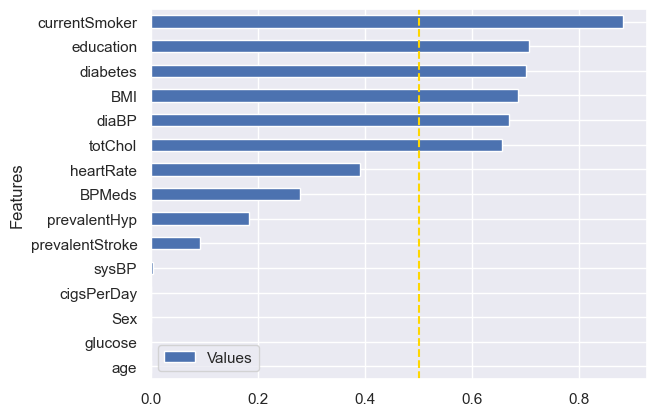

In [22]:
X_feat = X_train.columns
pv=model.pvalues
val = pd.DataFrame(pv[1:].values,columns=["Values"])
feats = pd.DataFrame(X_feat,columns=['Features'])
feat_val=pd.concat([feats,val],axis=1)
feat_val.set_index("Features",inplace=True)
feat_val.sort_values(by='Values').plot(kind='barh')
plt.axvline(x = 0.5, color ="gold",ls="--");

# 4. Predictions

In [23]:
np.set_printoptions(formatter={"float": lambda x:"{0:0.2f}".format(x)})
model.predict()

array([0.08, 0.37, 0.03, ..., 0.18, 0.04, 0.02])

In [24]:
np.array(df["TenYearCHD"])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 5.Evalution

In [25]:
model.pred_table()

array([[2494.00, 16.00],
       [420.00, 36.00]])

In [26]:
cm_df =pd.DataFrame(model.pred_table())
cm_df.columns =["Prediction 0","Prediction 1"]
cm_df = cm_df.rename(index = {0:"Actual 0",1:"Actual 1"})
print(cm_df)

          Prediction 0  Prediction 1
Actual 0        2494.0          16.0
Actual 1         420.0          36.0


In [27]:
prediction = model.get_prediction(exog=dict(X_test))
print(prediction.summary_frame(alpha=0.05))

      predicted        se  ci_lower  ci_upper
0      0.081110  0.015146  0.055954  0.116185
1      0.369981  0.064030  0.255271  0.501524
2      0.031157  0.005342  0.022228  0.043513
3      0.092925  0.012955  0.070458  0.121619
4      0.059196  0.009797  0.042669  0.081577
...         ...       ...       ...       ...
2961   0.049565  0.010034  0.033211  0.073360
2962   0.145056  0.018160  0.112954  0.184386
2963   0.184555  0.024372  0.141462  0.237148
2964   0.043484  0.007409  0.031067  0.060553
2965   0.022859  0.004494  0.015526  0.033538

[2966 rows x 4 columns]
